수치를 입력해서 수치를 예측하는 모델들에 대해서 알아보겠습니다. 수치예측을 위한 데이터셋 생성을 해보고, 선형회귀를 위한 가장 간단한 퍼셉트론 신경망 모델부터 깊은 다층퍼셉트론 신경망 모델까지 구성 및 학습을 시켜보겠습니다

---
### 데이터셋 준비

입력 x에 대해 2를 곱해 두 배 정도 값을 갖는 출력 y가 되도록 데이터셋을 생성해봤습니다. 선형회귀 모델을 사용한다면 Y = w * X + b 일 때, w가 2에 가깝고, b가 0.16에 가깝게 되도록 학습시키는 것이 목표입니다.

Y = w * X + b
Y = 2 * X + 0.16
(X, Y) > M
X' > M > Y 

In [ ]:
import numpy as np

# 데이터셋 생성
# 훈련셋
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0

# 시험셋
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

In [ ]:
np.random.random(1)

array([0.79385389])

In [ ]:
np.random.random(10)

array([0.58129072, 0.51319083, 0.36311633, 0.20870807, 0.77245734,
       0.38498321, 0.17147415, 0.82914618, 0.82800898, 0.66525455])

In [ ]:
np.random.random((10,2))

array([[0.69886334, 0.07649954],
       [0.77891036, 0.341007  ],
       [0.09911211, 0.95239196],
       [0.35991827, 0.22238385],
       [0.38888789, 0.35564398],
       [0.40580114, 0.16805037],
       [0.12012561, 0.69152712],
       [0.39761128, 0.09085922],
       [0.61432144, 0.1217822 ],
       [0.3619666 , 0.20500632]])

In [ ]:
x_train.shape

(1000, 1)

In [ ]:
y_train.shape

(1000, 1)

In [ ]:
x_train[:10]

array([[0.75824869],
       [0.92175318],
       [0.26694345],
       [0.37367465],
       [0.83155704],
       [0.18268177],
       [0.10789703],
       [0.85922568],
       [0.75568057],
       [0.50016434]])

In [ ]:
y_train[:10]

array([[1.77088053],
       [2.09509703],
       [0.76376795],
       [0.91609784],
       [1.76087535],
       [0.46901932],
       [0.22419784],
       [1.81311253],
       [1.67945239],
       [1.32457196]])

In [ ]:
x_test.shape

(100, 1)

In [ ]:
x_test[:10]

array([[8.47689533e-01],
       [7.95303529e-01],
       [2.13280878e-04],
       [9.58538071e-01],
       [3.46538363e-01],
       [6.31049989e-01],
       [8.60190031e-01],
       [7.98267027e-01],
       [4.63298645e-01],
       [2.70499755e-01]])

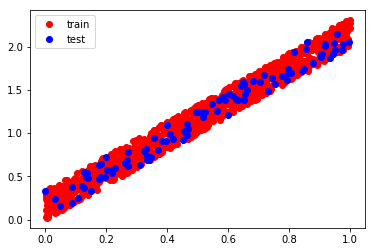

In [ ]:
# 데이터셋 확인
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_train, y_train, 'ro')
plt.plot(x_test, y_test, 'bo')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_5.png)

---
### 레이어 준비

본 장에서 사용되는 블록들은 다음과 같습니다.

|블록|이름|설명|
|:-:|:-:|:-|
|![img](http://tykimos.github.io/warehouse/DeepBrick/Model_Recipe_Part_Dataset_Vector_s.png)|Input data, Labels|1차원의 입력 데이터 및 라벨입니다.|
|![img](http://tykimos.github.io/warehouse/DeepBrick/Model_Recipe_Part_Dense_s.png)|Dense|모든 입력 뉴런과 출력 뉴런을 연결하는 전결합층입니다.|
|![img](http://tykimos.github.io/warehouse/DeepBrick/Model_Recipe_Part_Activation_Relu_s.png)|relu|활성화 함수로 주로 은닉층에 사용됩니다.|

---
### 모델 준비

수치예측을 하기 위해 `선형회귀 모델`, `퍼셉트론 신경망 모델`, `다층퍼셉트론 신경망 모델`, `깊은 다층퍼셉트론 신경망 모델`을 준비했습니다.

#### 선형회귀 모델

가장 간단한 1차 선형회귀 모델로 수치예측을 해보겠습니다. 아래 식에서 x, y는 우리가 만든 데이터셋이고, 회귀분석을 통해서, w와 b값을 구하는 것이 목표입니다. 

    Y = w * X + b
   
w와 b값을 구하게 되면, 임의의 입력 x에 대해서 출력 y가 나오는 데 이것이 예측 값입니다. w, b 값은 분산, 공분산, 평균을 이용하여 쉽게 구할 수 있습니다. 

    w = np.cov(X, Y, bias=1)[0,1] / np.var(X)
    b = np.average(Y) - w * np.average(X)
    
간단한 수식이지만 이 수식을 도출하기란 꽤나 복잡습니다. 오차를 최소화하는 극대값을 구하기 위해 편미분을 수행하고, 다시 식을 전개하는 등등의 과정이 필요합니다.

![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_0.png)    

#### 퍼셉트론 신경망 모델

Dense 레이어가 하나이고, 뉴런의 수도 하나인 가장 기본적인 퍼셉트론 모델입니다. 즉 웨이트(w) 하나, 바이어스(b) 하나로 전형적인 Y = w * X + b를 풀기 위한 모델입니다. 수치 예측을 하기 위해서 출력 레이어에 별도의 활성화 함수를 사용하지 않았습니다. w, b 값이 손으로 푼 선형회귀 최적해에 근접하려면 경우에 따라 만번이상의 에포크가 필요합니다. 실제로 사용하지는 않는 모델이지만 선형회귀부터 공부하시는 분들에게는 입문 모델로 나쁘지 않습니다.

    model = Sequential()
    model.add(Dense(1, input_dim=1))
        
![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_1m.png)

#### 다층퍼셉트론 신경망 모델

Dense 레이어가 두 개인 다층퍼셉트론 모델입니다. 첫 번째 레이어는 64개의 뉴런을 가진 Dense 레이어이고 오류역전파가 용이한 `relu` 활성화 함수를 사용하였습니다. 출력 레이어인 두 번째 레이어는 하나의 수치값을 예측을 하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수를 사용하지 않았습니다.

    model = Sequential()
    model.add(Dense(64, input_dim=1, activation='relu'))
    model.add(Dense(1))

![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_2m.png)

#### 깊은 다층퍼셉트론 신경망 모델

Dense 레이어가 총 세 개인 다층퍼셉트론 모델입니다. 첫 번째, 두 번째 레이어는 64개의 뉴런을 가진 Dense 레이어이고 오류역전파가 용이한 `relu` 활성화 함수를 사용하였습니다. 출력 레이어인 세 번째 레이어는 하나의 수치값을 예측을 하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수를 사용하지 않았습니다.

    model = Sequential()
    model.add(Dense(64, input_dim=1, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    
![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_3m.png)    

---
### 전체 소스

앞서 살펴본 `선형회귀 모델`, `퍼셉트론 신경망 모델`, `다층퍼셉트론 신경망 모델`, `깊은 다층퍼셉트론 신경망 모델`의 전체 소스는 다음과 같습니다. 

#### 선형회귀 모델

In [ ]:
# 0. 사용할 패키지 불러오기
import numpy as np
from sklearn.metrics import mean_squared_error
import random

# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

In [ ]:
x_train.shape

(1000, 1)

In [ ]:
x_train = x_train.reshape(1000,)
y_train = y_train.reshape(1000,)
x_test = x_test.reshape(100,)
y_test = y_test.reshape(100,)

In [ ]:
x_train.shape

(1000,)

In [ ]:
# 2. 모델 구성하기
w = np.cov(x_train, y_train, bias=1)[0,1] / np.var(x_train)
b = np.average(y_train) - w * np.average(x_train)

print w, b

2.0240294164954236 0.15731835484363033


In [ ]:
np.cov(x_train, y_train, bias=1)

array([[0.08019761, 0.16232232],
       [0.16232232, 0.33788067]])

In [ ]:
np.cov(x_train, y_train, bias=1)[0,1]

0.16232232208387068

In [ ]:
np.var(x_train)

0.08019761015377401

In [ ]:
x_test[:10]

array([0.32477723, 0.82934082, 0.00663228, 0.0699157 , 0.17605777,
       0.85775934, 0.19324577, 0.63672689, 0.24711895, 0.87113012])

In [ ]:
y_predict = w * x_test + b

print(y_predict)

[0.81467702 1.83592856 0.17074228 0.29882979 0.51366446 1.8934485
 0.54845347 1.4460723  0.65749437 1.92051133 0.70120626 2.08249323
 0.39959414 1.38601942 0.75955366 1.15650384 2.06273637 1.87096018
 1.09822026 0.80003703 0.31795451 0.5362344  1.16205057 0.7809779
 1.55590024 2.01242474 0.6902365  0.50700712 2.01592589 1.20468185
 1.2527728  1.82469797 1.1227607  0.87934052 1.27689971 1.18900091
 1.12082543 2.14542057 1.38426195 0.84518712 2.14089719 1.36312376
 1.09156418 0.26266676 0.71515444 1.03996148 1.04290966 0.29663834
 0.89211331 1.52944022 0.29968374 2.05256145 1.66767192 2.11723372
 1.60584695 1.5859705  1.38294779 0.85118431 1.74834381 0.74936128
 2.10436523 1.37361692 1.59124137 1.50415229 1.3016992  1.8941395
 2.16940365 2.12741154 1.89103892 1.05147009 0.87135796 2.16574796
 0.63767271 1.31165264 1.85819455 0.40472019 0.21194922 0.1648877
 1.618663   2.06974441 1.95278853 0.76213853 0.90591721 0.3203686
 1.76128676 1.99140056 1.16159296 0.47108587 0.89780678 1.29631524


In [ ]:
# 3. 모델 평가하기
y_predict = w * x_test + b
mse = mean_squared_error(y_test, y_predict)
print('mse : ' + str(mse))

mse : 0.010047495156494186


In [ ]:
y_test[:10]

array([0.95576894, 1.79897387, 0.02565426, 0.24529262, 0.39582205,
       1.82274168, 0.42389998, 1.33061154, 0.66636625, 1.99430655])

In [ ]:
y_predict[:10]

array([0.81467702, 1.83592856, 0.17074228, 0.29882979, 0.51366446,
       1.8934485 , 0.54845347, 1.4460723 , 0.65749437, 1.92051133])

#### 퍼셉트론 신경망 신경망 모델

In [ ]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

In [ ]:
# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

In [ ]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(1, input_dim=1))

In [ ]:
# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
1000/1000 [==============================] - 0s 209us/step - loss: 1.4057
Epoch 2/50
1000/1000 [==============================] - 0s 18us/step - loss: 1.3404
Epoch 3/50
1000/1000 [==============================] - 0s 16us/step - loss: 1.2854
Epoch 4/50
1000/1000 [==============================] - 0s 16us/step - loss: 1.2326
Epoch 5/50
1000/1000 [==============================] - 0s 16us/step - loss: 1.1810
Epoch 6/50
1000/1000 [==============================] - 0s 16us/step - loss: 1.1306
Epoch 7/50
1000/1000 [==============================] - 0s 16us/step - loss: 1.0818
Epoch 8/50
1000/1000 [==============================] - 0s 17us/step - loss: 1.0341
Epoch 9/50
1000/1000 [==============================] - 0s 18us/step - loss: 0.9873
Epoch 10/50
1000/1000 [==============================] - 0s 17us/step - loss: 0.9420
Epoch 11/50
1000/1000 [==============================] - 0s 18us/step - loss: 0.8976
Epoch 12/50
1000/1000 [==============================] - 0s 17us/step - l

In [ ]:
w, b = model.get_weights()
print w, b

[[0.9937349]] [0.69871473]


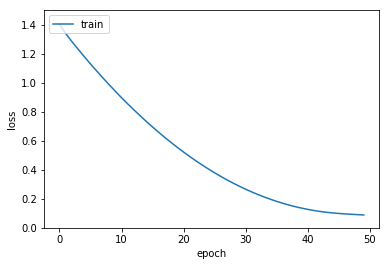

In [ ]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
# 6. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

100/100 [==============================] - 0s 199us/step
loss : 0.0987750185281


#### 다층퍼셉트론 신경망 모델

In [ ]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

In [ ]:
# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

In [ ]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(1))

In [ ]:
# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
1000/1000 [==============================] - 0s 89us/step - loss: 1.9716
Epoch 2/50
1000/1000 [==============================] - 0s 28us/step - loss: 1.5412
Epoch 3/50
1000/1000 [==============================] - 0s 20us/step - loss: 1.2243
Epoch 4/50
1000/1000 [==============================] - 0s 28us/step - loss: 0.9515
Epoch 5/50
1000/1000 [==============================] - 0s 22us/step - loss: 0.7143
Epoch 6/50
1000/1000 [==============================] - 0s 21us/step - loss: 0.5169
Epoch 7/50
1000/1000 [==============================] - 0s 26us/step - loss: 0.3602
Epoch 8/50
1000/1000 [==============================] - 0s 22us/step - loss: 0.2418
Epoch 9/50
1000/1000 [==============================] - 0s 34us/step - loss: 0.1566
Epoch 10/50
1000/1000 [==============================] - 0s 25us/step - loss: 0.1087
Epoch 11/50
1000/1000 [==============================] - 0s 24us/step - loss: 0.0870
Epoch 12/50
1000/1000 [==============================] - 0s 21us/step - lo

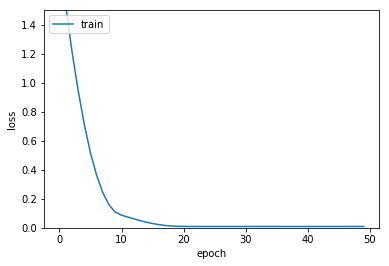

In [ ]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
# 6. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

100/100 [==============================] - 0s 190us/step
loss : 0.0110407521203


#### 깊은 다층퍼셉트론 신경망 모델

In [ ]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

In [ ]:
# 1. 데이터셋 생성하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

In [ ]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [ ]:
# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
1000/1000 [==============================] - 0s 85us/step - loss: 1.4749
Epoch 2/50
1000/1000 [==============================] - 0s 23us/step - loss: 0.6471
Epoch 3/50
1000/1000 [==============================] - 0s 45us/step - loss: 0.2249
Epoch 4/50
1000/1000 [==============================] - 0s 26us/step - loss: 0.0670
Epoch 5/50
1000/1000 [==============================] - 0s 26us/step - loss: 0.0396
Epoch 6/50
1000/1000 [==============================] - 0s 23us/step - loss: 0.0245
Epoch 7/50
1000/1000 [==============================] - 0s 25us/step - loss: 0.0133
Epoch 8/50
1000/1000 [==============================] - 0s 26us/step - loss: 0.0106
Epoch 9/50
1000/1000 [==============================] - 0s 23us/step - loss: 0.0098
Epoch 10/50
1000/1000 [==============================] - 0s 23us/step - loss: 0.0101
Epoch 11/50
1000/1000 [==============================] - 0s 24us/step - loss: 0.0099
Epoch 12/50
1000/1000 [==============================] - 0s 23us/step - lo

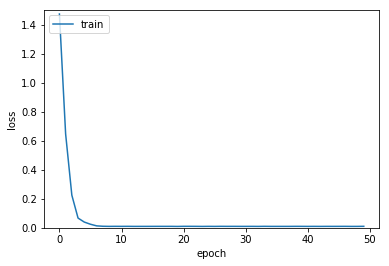

In [ ]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
# 6. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

100/100 [==============================] - 0s 157us/step
loss : 0.00954920487478


---

### 학습결과 비교

퍼셉트론 신경망 모델 > 다층퍼셉트론 신경망 모델 > 깊은 다층퍼셉트론 신경망 모델 순으로 학습이 좀 더 빨리 되는 것을 확인할 수 있습니다.

|퍼셉트론 신경망 모델|다층퍼셉트론 신경망 모델|깊은 다층퍼셉트론 신경망 모델|
|:-:|:-:|:-:|
|![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_6.png)|![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_7.png)|![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_8.png)|

---

### 요약

수치예측을 위한 퍼셉트론 신경망 모델, 다층퍼셉트론 신경망 모델, 깊은 다층퍼셉트론 신경망 모델을 살펴보고, 그 성능을 확인 해봤습니다.

![img](http://tykimos.github.io/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_4m.png)